In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import ndcg_score

In [3]:
df = pd.read_csv('Data_clean.csv') 

df_clean = df[["latitude","Longitude","rating"]]
df_clean

,latitude,Longitude,rating
0,1.347064,103.680822,4.3
1,1.307229,103.829332,3.9
2,1.247681,103.842072,4.3
3,1.323919,103.809989,3.6
4,1.376061,103.879155,3.9
...,...,...,...
326,1.299595,103.845818,4.2
327,1.392434,103.895412,4.1
328,1.287184,103.845137,3.7
329,1.336998,103.779553,4.0


In [11]:
x = df_clean.iloc[:,0:2].values
y = df_clean.iloc[:, 2].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [14]:
place_predict = lasso_regressor.predict([[1.347064,103.680822]])
print("rating", place_predict )

rating [4.0060423]


In [15]:
y_predict_lasso = lasso_regressor.predict((x_test))

In [20]:
mean_squared_error(y_test, y_predict_lasso)

0.08397302014130476

In [21]:
r2_score(y_test, y_predict_lasso)

-0.018191581800867107

# Normalising

In [34]:
df = pd.read_csv('./Data_clean.csv')
x = df[['latitude', 'Longitude']]
y = df['rating']
weight = df['user_ratings_total']
scaler = MinMaxScaler()
x_normalised = scaler.fit(x)
x_normalised = scaler.transform(x)
x_normalised

array([[0.485943  , 0.17647253],
       [0.29396345, 0.57235364],
       [0.00697512, 0.60631435],
       [0.37439643, 0.52078961],
       [0.62569321, 0.705164  ],
       [0.68019634, 0.67917953],
       [0.20623053, 0.61840985],
       [0.43572625, 0.45043682],
       [0.54572772, 0.72108928],
       [0.26004641, 0.6253678 ],
       [0.22624262, 0.56665309],
       [0.22137647, 0.60790682],
       [0.23517009, 0.64957906],
       [0.26556415, 0.77468109],
       [0.515071  , 0.86832068],
       [0.61006147, 0.62128638],
       [0.33027815, 0.74315868],
       [0.2740275 , 0.65925973],
       [0.55081171, 0.90245466],
       [0.40308394, 0.49314068],
       [0.56445111, 0.39905299],
       [0.41260323, 0.88428382],
       [0.30725489, 0.71357581],
       [0.27227902, 0.58564123],
       [0.20714477, 0.58586035],
       [0.        , 0.        ],
       [0.94321729, 0.56105464],
       [0.49474902, 0.22127854],
       [0.33857187, 0.38059612],
       [0.08840427, 0.54848624],
       [0.

In [35]:
y=np.array(y)
y = y.reshape(-1,1)
y_normalised = scaler.fit(y)
y_normalised = scaler.transform(y)
y_normalised

array([[0.78787879],
       [0.66666667],
       [0.78787879],
       [0.57575758],
       [0.66666667],
       [0.63636364],
       [0.75757576],
       [0.60606061],
       [0.63636364],
       [0.63636364],
       [0.78787879],
       [0.63636364],
       [0.81818182],
       [0.78787879],
       [0.87878788],
       [0.54545455],
       [0.63636364],
       [0.57575758],
       [0.75757576],
       [0.60606061],
       [0.6969697 ],
       [0.63636364],
       [0.78787879],
       [0.72727273],
       [0.66666667],
       [0.78787879],
       [0.6969697 ],
       [0.66666667],
       [0.60606061],
       [0.78787879],
       [0.72727273],
       [0.63636364],
       [0.63636364],
       [0.66666667],
       [0.75757576],
       [0.6969697 ],
       [0.72727273],
       [0.63636364],
       [0.72727273],
       [0.6969697 ],
       [0.6969697 ],
       [0.66666667],
       [0.78787879],
       [0.63636364],
       [0.78787879],
       [0.66666667],
       [0.66666667],
       [0.787

In [46]:
from sklearn.model_selection import train_test_split
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_normalised, y_normalised, test_size=0.3, random_state=0)

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(x_norm_train, y_norm_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [48]:
place_predict = lasso_regressor.predict([[1.347064,103.680822]])
print("rating", place_predict )

rating [0.69447724]


In [49]:
y_predict_lasso = lasso_regressor.predict((x_norm_test))

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_norm_test, y_predict_lasso)

0.006832801730658691

In [41]:
r2_score(y_norm_test, y_predict_lasso)

-0.030898333959644697

# Lasso Regression with Weight

In [51]:
x_norm_train, x_norm_test, y_norm_train, y_norm_test, weight_train, weight_test = train_test_split(x_normalised,y_normalised, weight, test_size=0.3)
lasso2 = Lasso()
parameters= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor2=GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor2.fit(x_norm_train, y_norm_train, weight_train)

y_predict_lasso2 = lasso_regressor2.predict((x_norm_test))
mean_squared_error(y_norm_test, y_predict_lasso2, weight_test)

C:\Users\jieun_ng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=277    4456
38       84
89      458
224     464
270    2610
       ... 
240       8
325     918
319    9159
33     1704
182      81
Name: user_ratings_total, Length: 231, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\jieun_ng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=222    15855
293     3163
28       121
92       288
317       11
       ...  
219     4221
227     3300
162     6189
279      271
198      868
Name: user_ratings_total, Length: 100, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.005390342402327565

In [69]:
r2_score(y_norm_test, y_predict_lasso2, weight_test)

C:\Users\jieun_ng\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass sample_weight=330    2289
181      13
176     220
278    2626
248     207
       ... 
56       18
285      79
241       7
290    1329
318     400
Name: user_ratings_total, Length: 100, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


-0.6940724834844372

# Adding relevance to find DCG score

In [54]:
df['relevance']=0

In [55]:
def compute_relevance(dataframe):
    for i in range(len(dataframe)):
        if dataframe['user_ratings_total'][i] <= 50:
            if 0 <= dataframe['rating'][i] <= 3.5:
                dataframe['relevance'][i] = 0
            elif 3.5 <= dataframe['rating'][i] <= 4.5:
                dataframe['relevance'][i] = 1
            else:
                dataframe['relevance'][i] = 2
        else:
            if 0 <= dataframe['rating'][i] <= 2:
                dataframe['relevance'][i] = 0
            elif 2 <= dataframe['rating'][i] <= 4:
                dataframe['relevance'][i] = 1
            else:
                dataframe['relevance'][i] = 2

In [56]:
compute_relevance(df)

C:\Users\jieun_ng\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\jieun_ng\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jieun_ng\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jieun_ng\Anaconda3\lib\site-packages\ipyke

In [57]:
df.to_csv('new_dataset.csv')

In [70]:
y = df['relevance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test.values)
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.6191444973416685
NDCG@10 = 0.6366134465686741
NDCG@20 = 0.6759363285839728


In [71]:
show = pd.DataFrame({'True Relevance': y_test, 'Predicted Score': y_pred}).sort_values(by='Predicted Score', ascending=False)
show.reset_index(drop = True, inplace=True)
pd.set_option('display.max_rows', len(y_test))
show

,True Relevance,Predicted Score
0,3.0,2.488636
1,3.0,2.488636
2,2.0,2.488636
3,4.0,2.488636
4,5.0,2.488636
5,4.0,2.488636
6,4.0,2.488636
7,2.0,2.488636
8,1.0,2.488636
9,4.0,2.488636


0.0
5.0


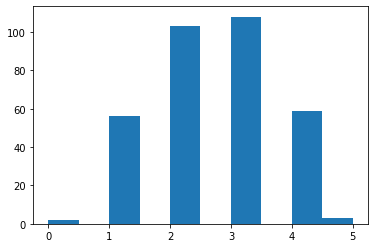

In [72]:
rating = df['rating']
users = df['user_ratings_total']
relevance = round(np.ceil(np.log(users)*rating)/10)
print(min(relevance))
print(max(relevance))
plt.hist(relevance)
df['relevance'] = relevance

In [73]:
y = df['relevance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test.values)
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.626865671641791
NDCG@10 = 0.6268656716417911
NDCG@20 = 0.6734384791467893


In [74]:
show = pd.DataFrame({'True Relevance': y_test, 'Predicted Score': y_pred}).sort_values(by='True Relevance', ascending=False)
show.reset_index(drop = True, inplace=True)
pd.set_option('display.max_rows', len(y_test))
show

,True Relevance,Predicted Score
0,4.0,2.534091
1,4.0,2.534091
2,4.0,2.534091
3,4.0,2.534091
4,4.0,2.534091
5,4.0,2.534091
6,4.0,2.534091
7,4.0,2.534091
8,4.0,2.534091
9,4.0,2.534091
